<a href="https://colab.research.google.com/github/ryandeperro/Data-Science-Fundamentals/blob/main/240_Homework_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy

In [ ]:
from google.colab import drive
drive.mount("/content/drive")
file_path = "/content/drive/My Drive/Colab Notebooks/"
crime = pd.read_csv(file_path + "crime.csv")

Mounted at /content/drive


In [ ]:
crime.columns

Index(['DR_NO', 'Date Rptd', 'DATE OCC', 'TIME OCC', 'AREA', 'AREA NAME',
       'Rpt Dist No', 'Part 1-2', 'Crm Cd', 'Crm Cd Desc', 'Mocodes',
       'Vict Age', 'Vict Sex', 'Vict Descent', 'Premis Cd', 'Premis Desc',
       'Weapon Used Cd', 'Weapon Desc', 'Status', 'Status Desc', 'Crm Cd 1',
       'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 'LOCATION', 'Cross Street', 'LAT',
       'LON'],
      dtype='object')

In [ ]:
crime

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,190326475,3/1/2020 0:00,3/1/2020 0:00,2130,7,Wilshire,784,1,510,VEHICLE - STOLEN,...,AA,Adult Arrest,510.0,998.0,NaN,NaN,1900 S LONGWOOD AV,NaN,34.0375,-118.3506
1,200106753,2/9/2020 0:00,2/8/2020 0:00,1800,1,Central,182,1,330,BURGLARY FROM VEHICLE,...,IC,Invest Cont,330.0,998.0,NaN,NaN,1000 S FLOWER ST,NaN,34.0444,-118.2628
2,200320258,11/11/2020 0:00,11/4/2020 0:00,1700,3,Southwest,356,1,480,BIKE - STOLEN,...,IC,Invest Cont,480.0,NaN,NaN,NaN,1400 W 37TH ST,NaN,34.0210,-118.3002
3,200907217,5/10/2023 0:00,3/10/2020 0:00,2037,9,Van Nuys,964,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),...,IC,Invest Cont,343.0,NaN,NaN,NaN,14000 RIVERSIDE DR,NaN,34.1576,-118.4387
4,200412582,9/9/2020 0:00,9/9/2020 0:00,630,4,Hollenbeck,413,1,510,VEHICLE - STOLEN,...,IC,Invest Cont,510.0,NaN,NaN,NaN,200 E AVENUE 28,NaN,34.0820,-118.2130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1005045,251004092,1/25/2025 0:00,1/24/2025 0:00,1240,10,West Valley,1008,1,331,THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND ...,...,IC,Invest Cont,331.0,NaN,NaN,NaN,7600 WOODLEY AV,NaN,34.2085,-118.4837
1005046,251704066,1/17/2025 0:00,1/17/2025 0:00,1600,17,Devonshire,1774,2,624,BATTERY - SIMPLE ASSAULT,...,IC,Invest Cont,624.0,NaN,NaN,NaN,9600 ZELZAH AV,NaN,34.2450,-118.5233
1005047,251104089,2/2/2025 0:00,1/30/2025 0:00,1730,11,Northeast,1101,1,330,BURGLARY FROM VEHICLE,...,IC,Invest Cont,330.0,NaN,NaN,NaN,2800 E OBSERVATORY RD,NaN,34.1192,-118.3004
1005048,252104053,1/19/2025 0:00,1/17/2025 0:00,1530,21,Topanga,2114,1,341,"THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...",...,IC,Invest Cont,341.0,NaN,NaN,NaN,22200 ELKWOOD ST,NaN,34.2128,-118.6103


In [ ]:
crime["Age Bin"] = pd.cut(crime["Vict Age"], bins=10)
crime["Time Bin"] = pd.cut(crime["TIME OCC"], bins=10)

In [ ]:
heatmap_data = crime.pivot_table(index="Time Bin", columns="Age Bin", aggfunc="size", fill_value=0)

heatmap_data = heatmap_data.iloc[::-1]

<ipython-input-6-b38a60e66aac>:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  heatmap_data = crime.pivot_table(index="Time Bin", columns="Age Bin", aggfunc="size", fill_value=0)


In [ ]:
import seaborn as sns

In [ ]:
location_counts = crime["AREA NAME"].value_counts()

In [ ]:
location_counts

,count
AREA NAME,
Central,69674
77th Street,61758
Pacific,59515
Southwest,57477
Hollywood,52432
N Hollywood,51111
Olympic,50065
Southeast,49935
Newton,49180


In [ ]:
crime_counts = crime["Crm Cd Desc"].value_counts()


In [ ]:
crime_counts

,count
Crm Cd Desc,
VEHICLE - STOLEN,115210
BATTERY - SIMPLE ASSAULT,74834
BURGLARY FROM VEHICLE,63518
THEFT OF IDENTITY,62539
"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)",61092
...,...
FIREARMS EMERGENCY PROTECTIVE ORDER (FIREARMS EPO),5
FIREARMS RESTRAINING ORDER (FIREARMS RO),4
DISHONEST EMPLOYEE ATTEMPTED THEFT,4


In [ ]:
top_crimes = crime_counts.nlargest(10)

In [ ]:
top_crimes

,count
Crm Cd Desc,
VEHICLE - STOLEN,115210
BATTERY - SIMPLE ASSAULT,74834
BURGLARY FROM VEHICLE,63518
THEFT OF IDENTITY,62539
"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)",61092
BURGLARY,57873
THEFT PLAIN - PETTY ($950 & UNDER),53722
"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",53530
INTIMATE PARTNER - SIMPLE ASSAULT,46711


In [ ]:
norm_location = plt.Normalize(vmin=location_counts.min(), vmax=location_counts.max())

In [ ]:
norm_crimes = plt.Normalize(vmin=top_crimes.min(), vmax=top_crimes.max())

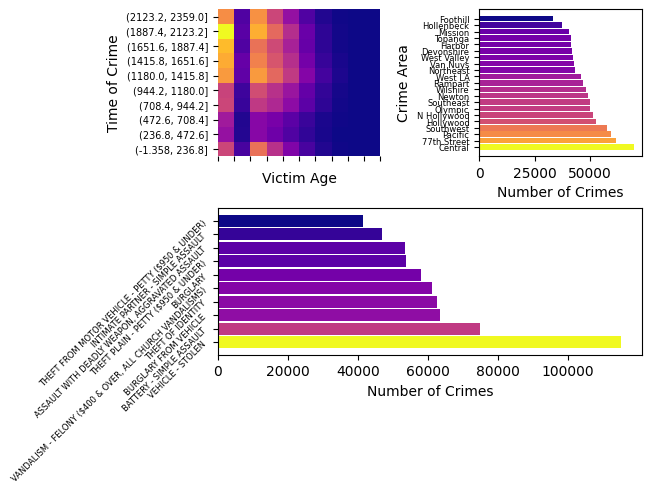

In [ ]:
fig, ax = plt.subplot_mosaic([['a)', 'b)'],
                               ['c)', 'c)']],
                              layout='constrained')


sns.heatmap(heatmap_data, ax=ax["a)"], cmap="plasma", cbar=False)
ax["a)"].set_xlabel("Victim Age")
ax["a)"].set_ylabel("Time of Crime")
ax["a)"].set_xticks(np.arange(0,11,1))
ax["a)"].tick_params(axis='y', labelsize=7)


ax["b)"].barh(location_counts.index, location_counts.values, height=.85, color=plt.cm.plasma(norm_location(location_counts.values)))
ax["b)"].set_xlabel("Number of Crimes")
ax["b)"].set_ylabel("Crime Area")
ax["b)"].tick_params(axis='y', labelsize=6)

ax["c)"].barh(top_crimes.index, top_crimes.values, height=0.90, color=plt.cm.plasma(norm_crimes(top_crimes.values)))
ax["c)"].set_xlabel("Number of Crimes")
ax["c)"].set_xticks(np.arange(0,100001, 20000))
plt.yticks(rotation=45, size=6)
plt.show()

In [ ]:
crime["LOCATION"].nunique()

66566

In [ ]:
crime["LOCATION"].value_counts()

,count
LOCATION,
800 N ALAMEDA ST,2598
700 S FIGUEROA ST,1711
100 THE GROVE DR,1687
10200 SANTA MONICA BL,1657
6TH ST,1585
...,...
3300 W 30TH ST,1
9400 ELSIE AV,1
13300 ERWIN ST,1
